In [1]:
import pandas as pd

full_df = pd.read_csv('delaney_descriptors.csv', index_col=0)
full_df.describe()

,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,204.631675,2.449133,2.173951,0.364932,0.708916,2.116259,0.249886,39.050944,0.442626,-3.057997
std,102.620500,1.866003,2.627398,0.343305,1.108335,2.165816,0.172352,39.134742,0.374868,2.096502
min,16.043000,-7.571400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,122.126000,1.414900,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.100000,-4.332250
50%,183.594500,2.340300,1.000000,0.375000,0.000000,2.000000,0.241379,26.300000,0.350384,-2.870500
75%,270.715750,3.406475,3.000000,0.666667,1.000000,3.000000,0.363636,61.475000,0.800000,-1.600000
max,780.949000,10.388600,23.000000,1.000000,11.000000,16.000000,0.857143,268.680000,1.000000,1.580000


/Users/gasp/miniconda3/envs/sol_pred/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


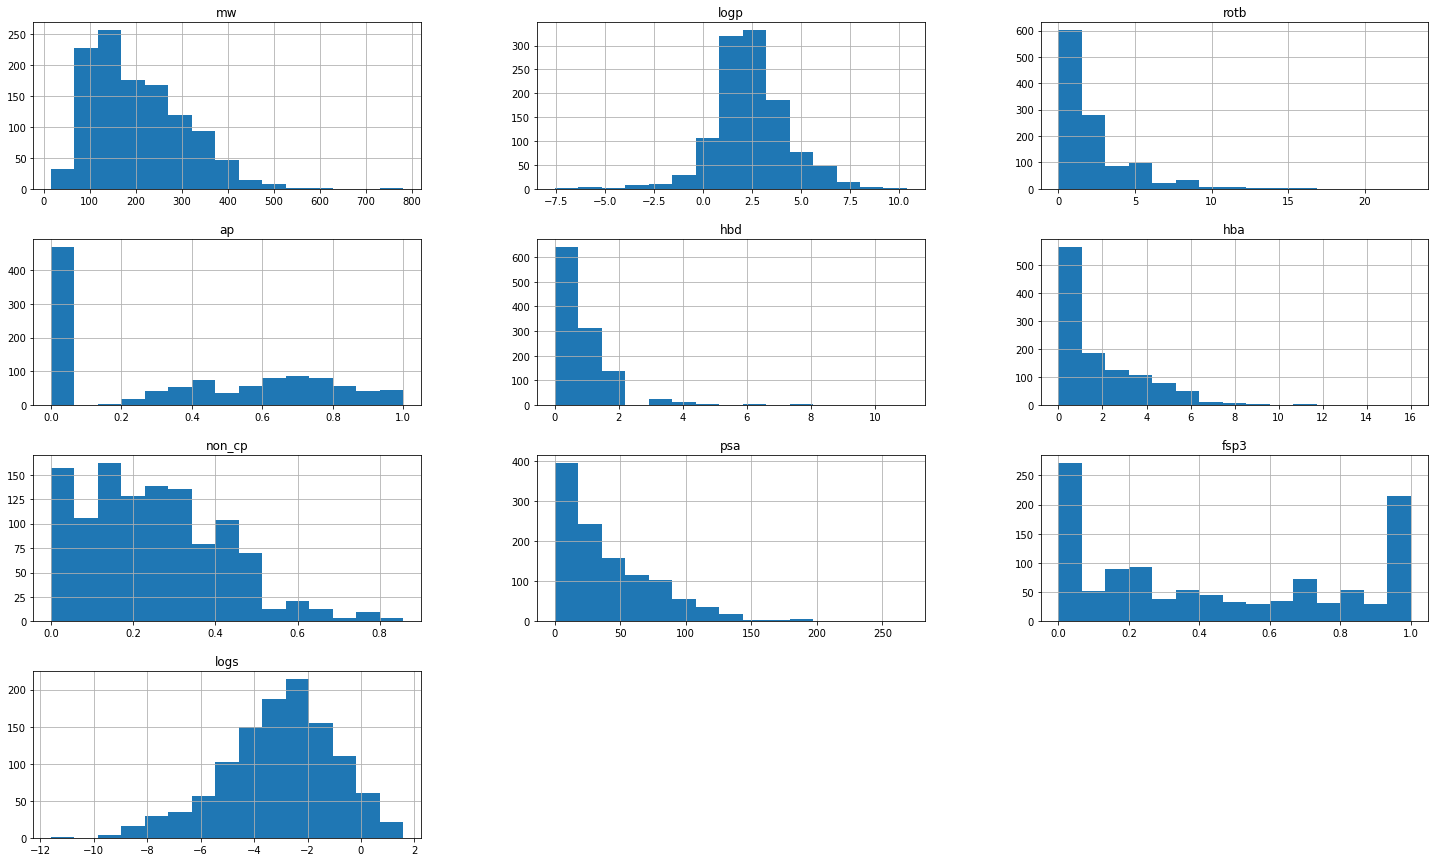

In [2]:
# checking feature distribution in the dataset
hist = full_df.hist(bins=15,figsize=(25, 15))

In [3]:
# leaving out 10% of the data set for validation
df = full_df.sample(frac=0.9, random_state=786)
df_unseen = full_df.drop(df.index)

df.reset_index(drop=True, inplace=True)
df_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (1030, 10)
Unseen Data For Predictions: (114, 10)


In [4]:
from pycaret.regression import *
reg = setup(
    df, 
    target = 'logs', 
    session_id=123, 
    train_size=0.8, 
    numeric_features=['rotb', 'hbd', 'hba'],
    transformation = True,
    normalize = True
)

,Description,Value
0,session_id,123
1,Target,logs
2,Original Data,"(1030, 10)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(824, 9)"


In [5]:
best_top3_models = compare_models(n_select=3)
# print(best_top3_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4847,0.4697,0.6808,0.8895,0.1814,0.5857,0.3370
lightgbm,Light Gradient Boosting Machine,0.4929,0.4816,0.6898,0.8868,0.1892,0.5057,0.0720
rf,Random Forest Regressor,0.5054,0.5154,0.7109,0.8790,0.1891,0.5922,0.4150
gbr,Gradient Boosting Regressor,0.5243,0.5333,0.7238,0.8753,0.2011,0.6113,0.1520
knn,K Neighbors Regressor,0.6022,0.6575,0.8049,0.8451,0.2213,0.6248,0.0610
ada,AdaBoost Regressor,0.6512,0.7304,0.8501,0.8278,0.2327,0.7676,0.1190
ridge,Ridge Regression,0.7171,0.8541,0.9232,0.7989,0.2735,0.6785,0.0190
br,Bayesian Ridge,0.7170,0.8543,0.9233,0.7989,0.2734,0.6795,0.0190
lr,Linear Regression,0.7173,0.8543,0.9233,0.7988,0.2737,0.6774,0.5020
huber,Huber Regressor,0.7094,0.8629,0.9277,0.7967,0.2746,0.6531,0.0360


In [6]:
# best = create_model(best_model)
best = create_model('lightgbm', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4515,0.3634,0.6028,0.8850,0.1472,0.2697
1,0.5656,0.5714,0.7559,0.8616,0.2282,0.3381
2,0.4808,0.4294,0.6553,0.8973,0.1764,0.2779
3,0.5093,0.4968,0.7049,0.8637,0.1901,0.2486
4,0.4893,0.3685,0.6070,0.9251,0.1705,0.2450
5,0.4656,0.4144,0.6437,0.9016,0.1612,0.2555
6,0.5107,0.5893,0.7677,0.8984,0.1925,0.3655
7,0.4559,0.3663,0.6052,0.9150,0.1542,0.2495
8,0.4620,0.5655,0.7520,0.8537,0.2222,0.5132
9,0.6328,0.7221,0.8497,0.8553,0.2910,2.4819


In [7]:
# tuning hyperparameters
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4576,0.3934,0.6272,0.8755,0.1653,0.5811
1,0.6453,0.7078,0.8413,0.8285,0.2546,0.5523
2,0.5166,0.5052,0.7108,0.8791,0.1776,0.3022
3,0.5373,0.5457,0.7387,0.8503,0.2112,0.2822
4,0.5040,0.4503,0.6710,0.9085,0.1842,0.2220
5,0.5021,0.4532,0.6732,0.8924,0.1860,0.2563
6,0.5134,0.5682,0.7538,0.9021,0.1920,0.2974
7,0.4650,0.4049,0.6363,0.9061,0.1669,0.2639
8,0.4881,0.6165,0.7852,0.8405,0.2292,0.5529
9,0.6313,0.7436,0.8623,0.8509,0.2756,2.5965


In [8]:
# predicting labels for the test set
predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.5259,0.5125,0.7159,0.8868,0.1908,0.3167


,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs,Label
0,-0.714795,0.096012,1.472607,-1.107178,-0.874183,-0.398550,-0.810932,-0.816287,1.394043,-1.850,-2.904689
1,-1.662581,-0.553420,-0.291065,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,0.571753,-1.640,-1.809847
2,0.918307,0.083469,-1.190226,-0.199278,1.722502,0.731868,-0.582592,0.824627,0.723230,-4.955,-3.045641
3,1.588661,1.934099,1.472607,0.313672,-0.874183,0.731868,-0.243877,0.207301,-0.278685,-6.291,-7.800035
4,-1.662581,-0.371238,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,-0.555632,-2.090,-1.809738
...,...,...,...,...,...,...,...,...,...,...,...
201,1.527812,1.091366,-1.190226,-1.107178,-0.874183,-0.398550,0.772109,-0.665334,1.073959,-6.290,-5.360657
202,-1.153357,0.142066,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,1.394043,-4.280,-3.922741
203,1.406738,2.525058,-0.291065,0.869448,-0.874183,-1.280530,0.590311,-1.271808,-1.265530,-8.600,-8.066155
204,-0.051618,-0.336513,0.354584,0.313672,-0.874183,1.075060,1.223028,1.259578,-0.749748,-2.820,-2.796153


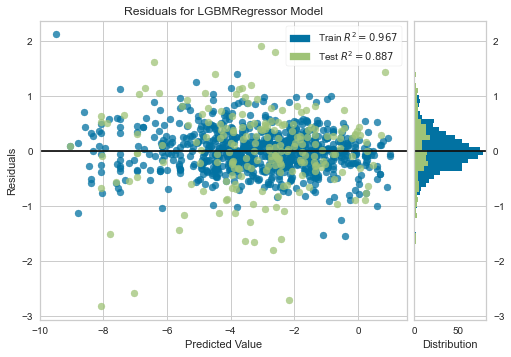

In [9]:
plot_model(tuned_best)

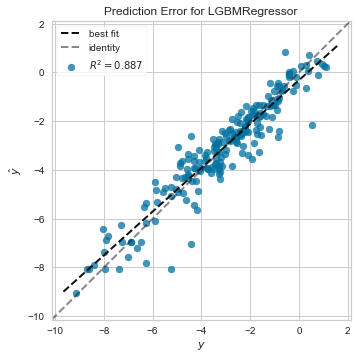

In [10]:
plot_model(tuned_best, plot='error')

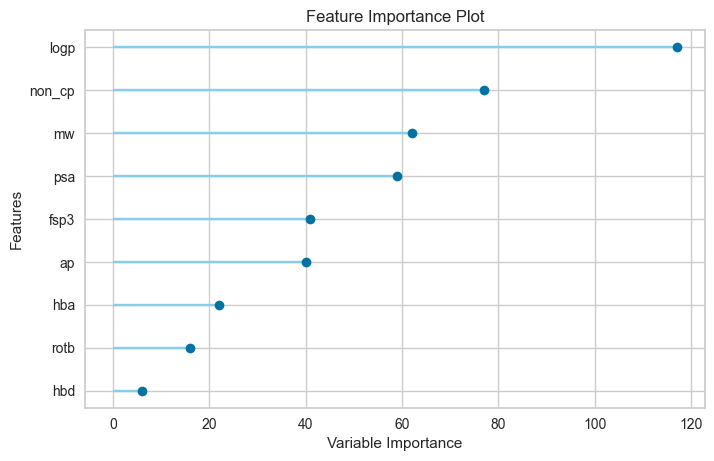

In [11]:
plot_model(tuned_best, plot='feature')

In [12]:
# train on full dataset and create the final model
final_model = finalize_model(tuned_best)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2731,0.1271,0.3566,0.9719,0.1137,0.1907


,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs,Label
0,-0.714795,0.096012,1.472607,-1.107178,-0.874183,-0.398550,-0.810932,-0.816287,1.394043,-1.850,-2.358180
1,-1.662581,-0.553420,-0.291065,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,0.571753,-1.640,-1.591590
2,0.918307,0.083469,-1.190226,-0.199278,1.722502,0.731868,-0.582592,0.824627,0.723230,-4.955,-4.544685
3,1.588661,1.934099,1.472607,0.313672,-0.874183,0.731868,-0.243877,0.207301,-0.278685,-6.291,-6.759552
4,-1.662581,-0.371238,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,-0.555632,-2.090,-2.031680
...,...,...,...,...,...,...,...,...,...,...,...
201,1.527812,1.091366,-1.190226,-1.107178,-0.874183,-0.398550,0.772109,-0.665334,1.073959,-6.290,-5.984329
202,-1.153357,0.142066,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,1.394043,-4.280,-3.847894
203,1.406738,2.525058,-0.291065,0.869448,-0.874183,-1.280530,0.590311,-1.271808,-1.265530,-8.600,-7.935544
204,-0.051618,-0.336513,0.354584,0.313672,-0.874183,1.075060,1.223028,1.259578,-0.749748,-2.820,-2.887387


In [13]:
unseen_predictions = predict_model(final_model, data=df_unseen)
unseen_predictions

,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs,Label
0,98.960,1.81000,0,0.000000,0,0,0.500000,0.00,1.000000,-1.290,-1.325800
1,118.176,1.40540,4,0.000000,0,2,0.250000,18.46,1.000000,-0.430,-1.199806
2,393.698,4.73660,0,0.600000,0,0,0.400000,0.00,0.000000,-6.980,-6.152938
3,181.449,3.64680,0,0.666667,0,0,0.333333,0.00,0.000000,-3.590,-4.275518
4,120.195,2.61186,0,0.666667,0,0,0.000000,0.00,0.333333,-3.400,-3.422365
...,...,...,...,...,...,...,...,...,...,...,...
109,242.344,1.34990,4,0.000000,2,3,0.312500,90.29,0.727273,-3.360,-2.871898
110,150.221,2.82402,1,0.545455,1,1,0.090909,20.23,0.400000,-2.220,-2.226133
111,304.670,4.84390,4,0.000000,0,2,0.375000,45.61,0.700000,-4.880,-4.733231
112,257.437,2.16090,3,0.000000,1,4,0.666667,65.57,1.000000,-0.220,-2.653212


In [14]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.871, 0.4897, 0.5251)

In [15]:
# Improving the model using ensemble techniques
bagged_dt = ensemble_model(tuned_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4878,0.4309,0.6564,0.8636,0.1659,0.3006
1,0.6192,0.6879,0.8294,0.8334,0.2505,0.4824
2,0.5143,0.4615,0.6793,0.8896,0.1637,0.3601
3,0.5142,0.5226,0.7229,0.8567,0.2162,0.2799
4,0.5157,0.4277,0.6540,0.9131,0.1779,0.2276
5,0.4840,0.4549,0.6745,0.8920,0.1639,0.2716
6,0.5177,0.5876,0.7666,0.8987,0.2031,0.3690
7,0.4812,0.4366,0.6607,0.8987,0.1650,0.3088
8,0.4608,0.5837,0.7640,0.8489,0.2199,0.4969
9,0.5989,0.6810,0.8252,0.8635,0.2725,2.5470


In [16]:
boosted_dt = ensemble_model(tuned_best, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4410,0.3375,0.5810,0.8932,0.1467,0.3103
1,0.6079,0.6337,0.7961,0.8465,0.2431,0.5037
2,0.4837,0.4045,0.6360,0.9032,0.1462,0.2648
3,0.5380,0.5838,0.7640,0.8399,0.2083,0.2902
4,0.5060,0.4038,0.6354,0.9180,0.1777,0.2287
5,0.5071,0.4573,0.6762,0.8914,0.1664,0.2847
6,0.5279,0.5701,0.7550,0.9017,0.1923,0.4574
7,0.4318,0.3764,0.6135,0.9127,0.1476,0.2037
8,0.4611,0.5539,0.7443,0.8567,0.2060,0.5084
9,0.6322,0.6978,0.8354,0.8601,0.2795,2.3806


In [17]:
bagged_dt2 = ensemble_model(tuned_best, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4672,0.3777,0.6145,0.8805,0.1534,0.4228
1,0.6006,0.6500,0.8062,0.8426,0.2401,0.4621
2,0.4784,0.4129,0.6426,0.9012,0.1502,0.3335
3,0.4943,0.4725,0.6874,0.8704,0.2010,0.2700
4,0.4958,0.3912,0.6255,0.9205,0.1797,0.2306
5,0.4749,0.4390,0.6626,0.8958,0.1630,0.2755
6,0.5223,0.5856,0.7653,0.8991,0.1996,0.3224
7,0.4670,0.4042,0.6358,0.9062,0.1615,0.3099
8,0.4425,0.5414,0.7358,0.8599,0.2167,0.4893
9,0.6293,0.7213,0.8493,0.8554,0.2803,2.6039


In [18]:
boosted_dt2 = ensemble_model(tuned_best, method='Boosting', n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4652,0.3706,0.6087,0.8827,0.1533,0.3341
1,0.6265,0.6646,0.8152,0.8390,0.2507,0.5127
2,0.4721,0.3924,0.6264,0.9061,0.1435,0.2962
3,0.5308,0.5415,0.7359,0.8515,0.2005,0.2692
4,0.4768,0.3884,0.6232,0.9211,0.1723,0.2338
5,0.4946,0.4497,0.6706,0.8932,0.1610,0.2874
6,0.5107,0.5274,0.7262,0.9091,0.1930,0.4095
7,0.4509,0.3931,0.6270,0.9088,0.1627,0.2112
8,0.4530,0.5037,0.7097,0.8697,0.2190,0.4970
9,0.6037,0.6786,0.8238,0.8640,0.2737,2.3438


In [19]:
# train individual models to blend
# can I tune them before blending?
lightgbm = create_model('lightgbm', verbose=False)
et = create_model('et', verbose=False)
rf = create_model('rf', verbose=False)

In [20]:
blender = blend_models(estimator_list = [lightgbm, et, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4220,0.3432,0.5858,0.8914,0.1479,0.3689
1,0.5661,0.5560,0.7456,0.8653,0.2242,0.4472
2,0.4665,0.4141,0.6435,0.9009,0.1585,0.2404
3,0.4980,0.4869,0.6978,0.8665,0.1796,0.2335
4,0.4645,0.3545,0.5954,0.9280,0.1642,0.1986
5,0.4506,0.4146,0.6439,0.9016,0.1513,0.2204
6,0.4741,0.4656,0.6824,0.9197,0.1707,0.4891
7,0.4195,0.3305,0.5749,0.9233,0.1423,0.2434
8,0.4064,0.5130,0.7162,0.8673,0.2058,0.4424
9,0.6222,0.7339,0.8567,0.8529,0.2749,2.5661


In [21]:
final_model = finalize_model(blender)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1533,0.0490,0.2213,0.9892,0.0700,0.1045


,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs,Label
0,-0.714795,0.096012,1.472607,-1.107178,-0.874183,-0.398550,-0.810932,-0.816287,1.394043,-1.850,-2.141873
1,-1.662581,-0.553420,-0.291065,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,0.571753,-1.640,-1.690186
2,0.918307,0.083469,-1.190226,-0.199278,1.722502,0.731868,-0.582592,0.824627,0.723230,-4.955,-4.662737
3,1.588661,1.934099,1.472607,0.313672,-0.874183,0.731868,-0.243877,0.207301,-0.278685,-6.291,-6.512749
4,-1.662581,-0.371238,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,-0.555632,-2.090,-2.148948
...,...,...,...,...,...,...,...,...,...,...,...
201,1.527812,1.091366,-1.190226,-1.107178,-0.874183,-0.398550,0.772109,-0.665334,1.073959,-6.290,-6.088699
202,-1.153357,0.142066,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,1.394043,-4.280,-4.137028
203,1.406738,2.525058,-0.291065,0.869448,-0.874183,-1.280530,0.590311,-1.271808,-1.265530,-8.600,-8.100654
204,-0.051618,-0.336513,0.354584,0.313672,-0.874183,1.075060,1.223028,1.259578,-0.749748,-2.820,-2.848296


In [22]:
unseen_predictions = predict_model(final_model, data=df_unseen)
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.8807, 0.4655, 0.4856)

In [23]:
stacker = stack_models(best_top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4338,0.3133,0.5598,0.9008,0.1457,0.2706
1,0.5725,0.5545,0.7446,0.8657,0.2228,0.5082
2,0.4685,0.4307,0.6563,0.8969,0.1462,0.2725
3,0.4833,0.4559,0.6752,0.8750,0.1644,0.2194
4,0.4388,0.3197,0.5655,0.9350,0.1541,0.1966
5,0.4585,0.4412,0.6642,0.8952,0.1558,0.2378
6,0.4832,0.4743,0.6887,0.9182,0.1753,0.4067
7,0.4436,0.3506,0.5921,0.9187,0.1541,0.2684
8,0.4091,0.4872,0.6980,0.8739,0.1986,0.4097
9,0.5756,0.6208,0.7879,0.8756,0.2796,2.3009


In [24]:
final_model = finalize_model(stacker)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.1396,0.0429,0.2071,0.9905,0.0593,0.0927


,mw,logp,rotb,ap,hbd,hba,non_cp,psa,fsp3,logs,Label
0,-0.714795,0.096012,1.472607,-1.107178,-0.874183,-0.398550,-0.810932,-0.816287,1.394043,-1.850,-1.980939
1,-1.662581,-0.553420,-0.291065,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,0.571753,-1.640,-1.627240
2,0.918307,0.083469,-1.190226,-0.199278,1.722502,0.731868,-0.582592,0.824627,0.723230,-4.955,-5.024541
3,1.588661,1.934099,1.472607,0.313672,-0.874183,0.731868,-0.243877,0.207301,-0.278685,-6.291,-6.321849
4,-1.662581,-0.371238,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,-0.555632,-2.090,-2.091033
...,...,...,...,...,...,...,...,...,...,...,...
201,1.527812,1.091366,-1.190226,-1.107178,-0.874183,-0.398550,0.772109,-0.665334,1.073959,-6.290,-6.063025
202,-1.153357,0.142066,0.354584,-1.107178,-0.874183,-1.280530,-1.668326,-1.271808,1.394043,-4.280,-4.005550
203,1.406738,2.525058,-0.291065,0.869448,-0.874183,-1.280530,0.590311,-1.271808,-1.265530,-8.600,-7.999057
204,-0.051618,-0.336513,0.354584,0.313672,-0.874183,1.075060,1.223028,1.259578,-0.749748,-2.820,-2.885385


In [25]:
unseen_predictions = predict_model(final_model, data=df_unseen)
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.8886, 0.4572, 0.4537)

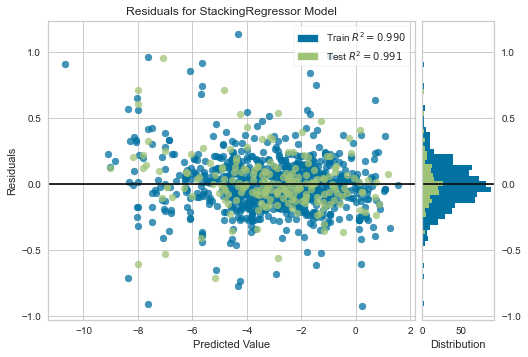

In [26]:
plot_model(final_model)

In [27]:
save_model(final_model,'sol_pred_model_delaney')
saved_final_model = load_model('sol_pred_model_delaney')
unseen_predictions = predict_model(saved_final_model, data=df_unseen)
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


(0.8886, 0.4572, 0.4537)